In [ ]:
"""
Created on Tue Mar 12 15:21:32 2024

@author: Kinjal Bandopadhyay
"""

'\nCreated on Tue Mar 12 15:21:32 2024\n\n@author: Kinjal Bandopadhyay\n'

In [ ]:
#Import the necessary libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
import numpy as np


In [ ]:
#Reading the data from drive

df=pd.read_excel("/content/drive/MyDrive/user_purchase_behavior.xlsx")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Displaying top 5 records of the dataset.

df.head(5)

,UserID,Gender,Age,JoiningDate,Location,OrderQuantity,TotalOrderValue,DiscountApplied,Target
0,1,woman,30,2023-10-29,Suburban,5,166.38,11.52,Premium
1,2,Female,41,2020-07-22,Suburban,9,200.62,12.97,Economic
2,3,Female,38,2023-02-06,Rural,6,824.63,21.65,Economic
3,4,Male,62,2018-02-14,Suburban,8,371.29,6.95,Economic
4,5,Male,60,2020-02-24,Suburban,5,998.11,20.69,Premium


In [ ]:
#Checking out the total number of records present in my dataset.

print("This data contains ",df.shape[0], "cases of user activities in e-commerce website")

This data contains  5000 cases of user activities in e-commerce website


In [ ]:
#Checking out the number of null values present in each column of my dataset.

df.isnull().sum()

UserID             0
Gender             0
Age                0
JoiningDate        0
Location           0
OrderQuantity      0
TotalOrderValue    0
DiscountApplied    0
Target             0
dtype: int64

The dataset has no null values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UserID           5000 non-null   int64         
 1   Gender           5000 non-null   object        
 2   Age              5000 non-null   int64         
 3   JoiningDate      5000 non-null   datetime64[ns]
 4   Location         5000 non-null   object        
 5   OrderQuantity    5000 non-null   int64         
 6   TotalOrderValue  5000 non-null   float64       
 7   DiscountApplied  5000 non-null   float64       
 8   Target           5000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 351.7+ KB


From here we could see that there are:
Categorical Variables: 'Gender', 'Location', and 'Target' (3 columns).
Numerical Variables: 'UserID', 'Age', 'JoiningDate', 'OrderQuantity', 'TotalOrderValue', and 'DiscountApplied' (6 columns).

In [ ]:
#Checking the different classes present on the features with datatype as "object"

unique_classes_location = df['Location'].unique()
print("Unique classes in 'Location' column:", unique_classes_location)

# Print unique classes in the 'Gender' column
unique_classes_gender = df['Gender'].unique()
print("Unique classes in 'Gender' column:", unique_classes_gender)

# Print unique classes in the 'Target' column
unique_classes_target = df['Target'].unique()
print("Unique classes in 'Target' column:", unique_classes_target)

Unique classes in 'Location' column: ['Suburban' 'Rural' 'Urban']
Unique classes in 'Gender' column: ['woman' 'Female' 'Male' 'girl' 'F' 'man' 'boy' 'M']
Unique classes in 'Target' column: ['Premium' 'Economic']


Location Column: Three unique classes: 'Suburban', 'Rural', 'Urban'.
Represents the geographic location of users.
Gender Column:

Multiple unique classes: 'woman', 'Female', 'Male', 'girl', 'F', 'man', 'boy', 'M'.
Some inconsistencies and duplicates (e.g., 'woman' and 'Female', 'man' and 'Male').
Potential need for standardization and consolidation of gender labels.
Target Column:

Two unique classes: 'Premium' and 'Economic'.
Represents the target variable for classification.



In [ ]:
#Checking whether the classes present in "Gender" is categorized based on specific age range or not.

# Convert gender classes to lowercase for consistency
df['Gender'] = df['Gender'].str.lower()

# Create a DataFrame to store the age range for each gender
gender_age_ranges = df.groupby('Gender')['Age'].agg(['min', 'max'])

# Display the result
print("Age range for each gender:")
print(gender_age_ranges)

Age range for each gender:
        min  max
Gender          
boy      29   67
f        26   54
female  -10  953
girl     23   67
m        23   64
male    -10  958
man      29   58
woman    18   67


Gender Labels:

1. Various labels are present, introducing variations: 'boy', 'f', 'female', 'girl', 'm', 'male', 'man', 'woman'.
2. Inconsistencies in labeling are evident ('f' and 'female', 'm' and 'male').
3. Classes in the 'Gender' column appear not categorized for different age groups; this may indicate an error in the data.

Age Range:

1. Unusual values such as negative ages ('female' and 'male') require investigation.
2. Wide age ranges are observed for each gender, with potentially erroneous extremes.
3. Possible data entry errors or outliers, notably ages like -10 and 953.
4. The classes in the 'Gender' column may not align with logical age groupings, suggesting a data quality issue.

In [ ]:
#Found that no specific age range is considered while categorizing into different classes present in "Gender".

# Standardize gender classes
df['Gender'] = df['Gender'].str.lower()
df['Gender'].replace({'f': 'female','girl': 'female','woman': 'female', 'm': 'male','boy':'male','man':'male'}, inplace=True)

# Handle outliers in age column

df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]  # Assuming a reasonable upper limit for age

# Verify the changes
print("Updated age range for each gender:")
gender_age_ranges = df.groupby('Gender')['Age'].agg(['min', 'max'])
print(gender_age_ranges)


Updated age range for each gender:
        min  max
Gender          
female    0   69
male      0   69


Gender Labels Standardization:

1. The original gender labels were inconsistent and not categorized into specific age groups.
2. Standardized gender classes to 'female' and 'male' by converting all labels to lowercase and replacing various alternatives.

Handling Outliers in Age Column:

1. Identified outliers in the 'Age' column, including negative values and extreme ages like 953.
2. Removed outliers by keeping ages within the reasonable range of 0 to 100.

Updated Age Ranges:

1. After processing, the age range for both 'female' and 'male' is now between 0 and 69.
2. Provides a more realistic and reasonable distribution of ages within each gender category.

In [ ]:
#Finding out the minimum and maximum value of the following features.

features = ['OrderQuantity', 'TotalOrderValue', 'DiscountApplied']

for feature in features:
    feature_ranges = df.groupby('Gender')[feature].agg(['min', 'max'])
    print(f"\n{feature} range for each gender:")
    print(feature_ranges)


OrderQuantity range for each gender:
        min  max
Gender          
female    1    9
male      1    9

TotalOrderValue range for each gender:
           min     max
Gender                
female  100.13  999.83
male    100.22  999.98

DiscountApplied range for each gender:
        min   max
Gender           
female  5.0  30.0
male    5.0  30.0


Order Quantity:

1. Both 'female' and 'male' customers have ordered between 1 and 9 items.
2. Consistent order quantity ranges between genders.

Total Order Value:

1. 'female' customers have total order values ranging from 100.13 to 999.83.
2. 'male' customers also show a similar range, with total order values between 100.22 and 999.98.
3. Comparable ranges for total order value between genders.

Discount Applied:

1. Both 'female' and 'male' customers have experienced discounts ranging from 5.0 to 30.0.
2. The discount applied is consistent across genders.

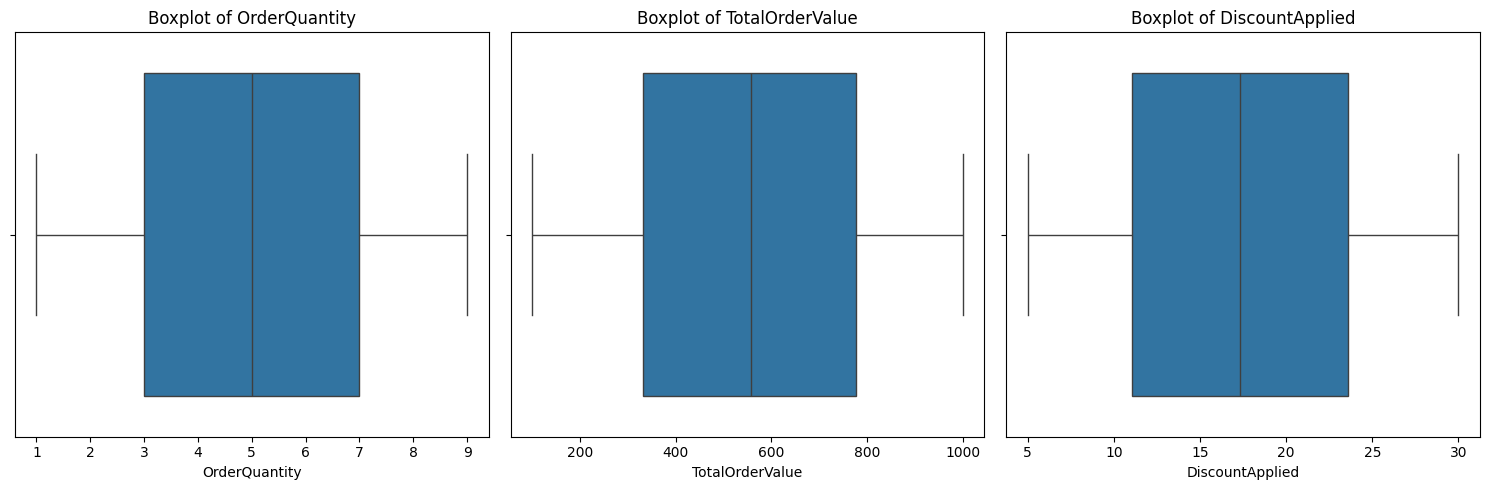

In [ ]:
#Checking out whether there are outliers present in the following potential features.

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot boxplots for each numerical feature
numerical_features = ['OrderQuantity', 'TotalOrderValue', 'DiscountApplied']

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

# Show the plots
plt.tight_layout()
plt.show()


No outliers found in the columns 'OrderQuantity', 'TotalOrderValue', 'DiscountApplied'.

In [ ]:

# Initialize label encoders for 'Location', 'Gender', and 'Target'
label_encoder_location = LabelEncoder()
label_encoder_gender = LabelEncoder()
label_encoder_target = LabelEncoder()

# Apply label encoding to the respective columns
df['Location'] = label_encoder_location.fit_transform(df['Location'])
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df['Target'] = label_encoder_target.fit_transform(df['Target'])

# Print labels and their corresponding numbers for Location
print("Location labels and their corresponding numbers:")
for label, number in zip(label_encoder_location.classes_, label_encoder_location.transform(label_encoder_location.classes_)):
    print(f"{label} encoded as {number}")

# Print labels and their corresponding numbers for Gender
print("\nGender labels and their corresponding numbers:")
for label, number in zip(label_encoder_gender.classes_, label_encoder_gender.transform(label_encoder_gender.classes_)):
    print(f"{label} encoded as {number}")

# Print labels and their corresponding numbers for Target
print("\nTarget labels and their corresponding numbers:")
for label, number in zip(label_encoder_target.classes_, label_encoder_target.transform(label_encoder_target.classes_)):
    print(f"{label} encoded as {number}")


Location labels and their corresponding numbers:
Rural encoded as 0
Suburban encoded as 1
Urban encoded as 2

Gender labels and their corresponding numbers:
female encoded as 0
male encoded as 1

Target labels and their corresponding numbers:
Economic encoded as 0
Premium encoded as 1


<ipython-input-15-fcc2cb0e43a3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='cividis', linewidths=.5)


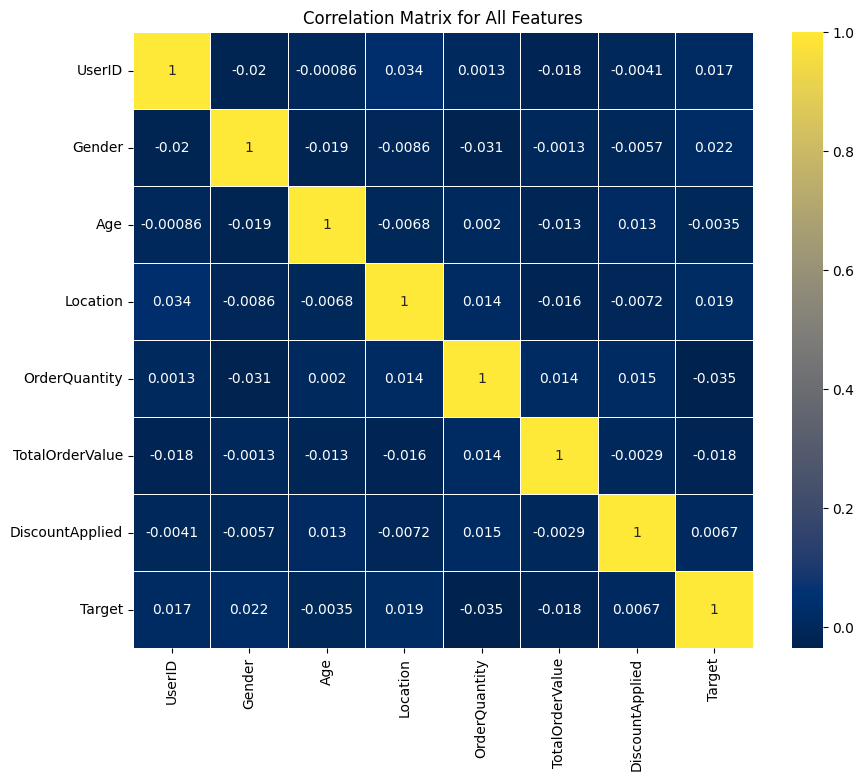

In [ ]:
# Plot a heatmap of the correlation matrix for all features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='cividis', linewidths=.5)
plt.title('Correlation Matrix for All Features')
plt.show()

Correlation Values:

1. The correlation matrix shows the pairwise correlation coefficients between different columns in the dataset.
2. Values range from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

Key Correlations:

a. Notable positive correlations:

1. 'OrderQuantity' and 'DiscountApplied' have a correlation coefficient of 0.014915.
2. 'Location' and 'Target' have a correlation coefficient of 0.018724.
3. 'Gender' and 'Target' have a correlation coefficient of 0.021583.

b. Notable negative correlations:

1. 'OrderQuantity' and 'Target' have a negative correlation coefficient of -0.035453.
2. 'TotalOrderValue' and 'Target' have a negative correlation coefficient of -0.017951.

Interpretation:

1. Positive correlations suggest that as one variable increases, the other tends to increase as well.
2. Negative correlations suggest that as one variable increases, the other tends to decrease.
3. Correlation does not imply causation, meaning a correlation between variables does not necessarily indicate a cause-and-effect relationship.

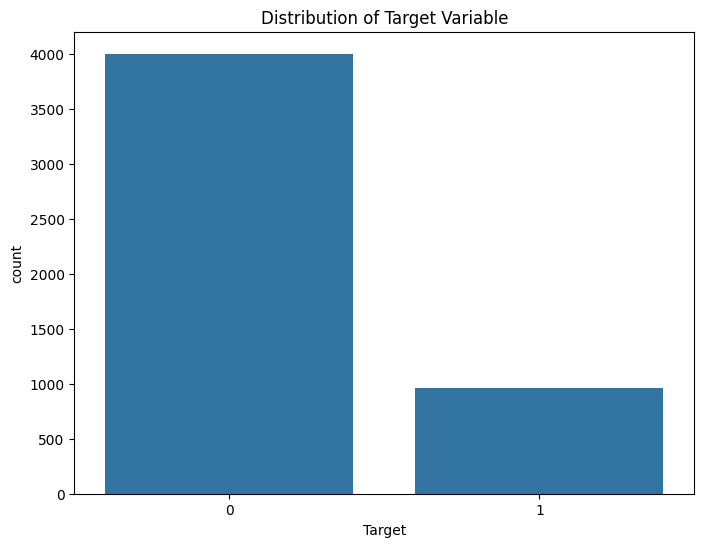

In [ ]:
# Understand the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

The distribution of data in the dataset exhibits an imbalance.

In [ ]:

# Select the feature to scale
feature_to_scale = ['TotalOrderValue']

# Initialize the StandardScaler
scaler = StandardScaler()

# Reshape the input to a 2D array and then fit and transform
df['TotalOrderValue'] = scaler.fit_transform(df[feature_to_scale].values.reshape(-1, 1))

# Display the scaled DataFrame
print("Scaled DataFrame with only 'TotalOrderValue' scaled:")
df.head(5)

Scaled DataFrame with only 'TotalOrderValue' scaled:


,UserID,Gender,Age,JoiningDate,Location,OrderQuantity,TotalOrderValue,DiscountApplied,Target
0,1,0,30,2023-10-29,1,5,-1.495280,11.52,1
1,2,0,41,2020-07-22,1,9,-1.362752,12.97,0
2,3,0,38,2023-02-06,0,6,1.052524,21.65,0
3,4,1,62,2018-02-14,1,8,-0.702161,6.95,0
4,5,1,60,2020-02-24,1,5,1.723991,20.69,1


Feature Scaling:

1. The feature 'TotalOrderValue' has been selected for scaling using the StandardScaler.
2. StandardScaler is applied to transform the values, ensuring consistency in scale and aiding machine learning algorithms that are sensitive to the magnitude of features.

Scaled DataFrame:

The DataFrame has been updated with the scaled values for 'TotalOrderValue.'

In [ ]:
#New columns, 'Year,' 'Month,' and 'Day,' are created to represent the respective year, month, and day components extracted from the 'JoiningDate' column.

df['JoiningDate'] = pd.to_datetime(df['JoiningDate'])  # Convert to datetime if not already
df['Year'] = df['JoiningDate'].dt.year
df['Month'] = df['JoiningDate'].dt.month
df['Day'] = df['JoiningDate'].dt.day

# Drop the original 'JoiningDate' column
df = df.drop('JoiningDate', axis=1)
df.head(5)

,UserID,Gender,Age,Location,OrderQuantity,TotalOrderValue,DiscountApplied,Target,Year,Month,Day
0,1,0,30,1,5,-1.495280,11.52,1,2023,10,29
1,2,0,41,1,9,-1.362752,12.97,0,2020,7,22
2,3,0,38,0,6,1.052524,21.65,0,2023,2,6
3,4,1,62,1,8,-0.702161,6.95,0,2018,2,14
4,5,1,60,1,5,1.723991,20.69,1,2020,2,24


The original 'JoiningDate' column is dropped from the DataFrame, likely to streamline the dataset and facilitate subsequent analyses.

In [ ]:
#Created a new Dataframe be dropping the less important columns that are not required for building the machine learning model.

new_df = df.drop('UserID', axis=1)

# Display the new DataFrame
new_df.head(5)

,Gender,Age,Location,OrderQuantity,TotalOrderValue,DiscountApplied,Target,Year,Month,Day
0,0,30,1,5,-1.495280,11.52,1,2023,10,29
1,0,41,1,9,-1.362752,12.97,0,2020,7,22
2,0,38,0,6,1.052524,21.65,0,2023,2,6
3,1,62,1,8,-0.702161,6.95,0,2018,2,14
4,1,60,1,5,1.723991,20.69,1,2020,2,24


In [ ]:
# Create the predictor variable

x = new_df.drop('Target', axis=1)

# Create the target variable (y)
y = new_df['Target']

In [ ]:
x.head(5)

,Gender,Age,Location,OrderQuantity,TotalOrderValue,DiscountApplied,Year,Month,Day
0,0,30,1,5,-1.495280,11.52,2023,10,29
1,0,41,1,9,-1.362752,12.97,2020,7,22
2,0,38,0,6,1.052524,21.65,2023,2,6
3,1,62,1,8,-0.702161,6.95,2018,2,14
4,1,60,1,5,1.723991,20.69,2020,2,24


In [ ]:
y.head(5)

0    1
1    0
2    0
3    0
4    1
Name: Target, dtype: int64

In [ ]:
#splitting the data
x_train_full, x_test, y_train_full, y_test=train_test_split(x,y,random_state=15)

In [ ]:
# Set up logistic regression model
lr_model = LogisticRegression(max_iter=1000)

# Perform k-fold cross-validation with 5 folds
cv_scores = cross_val_score(lr_model, x_train_full, y_train_full, cv=5, n_jobs=-1)

# Compute the average cross-validation score
avg_cv_score = np.mean(cv_scores)
print(f"Average cross-validation score: {avg_cv_score:.4f}")



Average cross-validation score: 0.8103


In [ ]:
# Fit the model on the entire training data
lr_model.fit(x_train_full, y_train_full)

# Compute the training accuracy
train_score = accuracy_score(y_train_full, lr_model.predict(x_train_full))
print(f"Training accuracy: {train_score:.4f}")


Training accuracy: 0.8103


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you already have the trained logistic regression model (lr_model)
# and the test set (x_test, y_test)

# Make predictions on the test set
y_pred = lr_model.predict(x_test)

# Calculate and print testing accuracy
testing_accuracy = accuracy_score(y_test, y_pred)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Calculate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate and print precision, recall, and F1-score
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Testing Accuracy: 0.7960
Confusion Matrix:
[[987   0]
 [253   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       987
           1       0.00      0.00      0.00       253

    accuracy                           0.80      1240
   macro avg       0.40      0.50      0.44      1240
weighted avg       0.63      0.80      0.71      1240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression Model:

1. A logistic regression model was trained and evaluated using k-fold cross-validation with 5 folds on the training data.
2. The average cross-validation score was found to be 0.8103.

Training Accuracy:

1. The logistic regression model achieved a training accuracy of 0.8103 when fitted to the entire training dataset.

Testing Evaluation:

1. When applied to the test set, the model achieved a testing accuracy of 0.7960.
2. The confusion matrix indicates that the model correctly predicted 987 instances of the negative class (0) but failed to predict any instances of the positive class (1).
3. The precision for the positive class is 0.00, indicating that the model struggled to correctly identify positive instances.
4. The recall for the positive class is also 0.00, highlighting a deficiency in capturing all positive instances.
5. The F1-score, a balance of precision and recall, is low for the positive class, indicating an overall challenge in predicting positive instances.

Considerations:

The model performed well on the training data, but its performance on the test set, especially for the positive class, is suboptimal.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Set up XGBoost classifier
clf = xgb.XGBClassifier(random_state=15)

# Set up range of n_estimators to try
n_estimators_range = [2, 8, 20, 40, 70, 80, 100]

# Initialize variables to store cross-validation scores and accuracy scores
cv_scores = []
accuracy_scores = []
best_model = None
best_score = -1

# Loop through n_estimators
for n_estimators in n_estimators_range:
    print(f"Trying n_estimators={n_estimators}")

    # Set up XGBoost classifier with current n_estimators
    clf_current = xgb.XGBClassifier(n_estimators=n_estimators,learning_rate=0.05,n_jobs=-1, random_state=15)

    # Perform k-fold cross-validation
    cv_scores_this_n = cross_val_score(clf_current, x_train_full, y_train_full, cv=5, n_jobs=-1, scoring='accuracy')

    # Compute the average cross-validation score
    avg_cv_score = np.mean(cv_scores_this_n)
    cv_scores.append(avg_cv_score)

    # Fit the classifier to the training data
    clf_current.fit(x_train_full, y_train_full)

    # Evaluate the classifier on the training data
    y_train_pred = clf_current.predict(x_train_full)
    train_score = accuracy_score(y_train_full, y_train_pred)
    accuracy_scores.append(train_score)

    print(f"Average cross-validation score: {avg_cv_score:.4f}")
    print(f"Training accuracy score: {train_score:.4f}\n")

     # Check if this is the best model so far
    if avg_cv_score > best_score:
        best_model = clf
        best_score = avg_cv_score
        best_train_score=train_score

print(f"Best model: {best_model}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Training accuracy score: {best_train_score:.4f}")

Trying n_estimators=2
Average cross-validation score: 0.8103
Training accuracy score: 0.8103

Trying n_estimators=8
Average cross-validation score: 0.8103
Training accuracy score: 0.8103

Trying n_estimators=20
Average cross-validation score: 0.8106
Training accuracy score: 0.8103

Trying n_estimators=40
Average cross-validation score: 0.8103
Training accuracy score: 0.8122

Trying n_estimators=70
Average cross-validation score: 0.8090
Training accuracy score: 0.8187

Trying n_estimators=80
Average cross-validation score: 0.8084
Training accuracy score: 0.8197

Trying n_estimators=100
Average cross-validation score: 0.8087
Training accuracy score: 0.8238

Best model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, im

In [ ]:
# Fit the best model to the training data
best_model.fit(x_train_full, y_train_full)

# Use the best model for prediction on the test data
y_test_pred = best_model.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the confusion matrix and accuracy on the test data
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy on Unseen Data:", test_accuracy)

# Calculate and print precision, recall, and F1-score
classification_rep = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[923  64]
 [242  11]]

Accuracy on Unseen Data: 0.7532258064516129
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       987
           1       0.15      0.04      0.07       253

    accuracy                           0.75      1240
   macro avg       0.47      0.49      0.46      1240
weighted avg       0.66      0.75      0.70      1240



XGBoost Model Tuning:

1. XGBoost classifier is tuned by varying the number of estimators ('n_estimators') in the range [2, 8, 20, 40, 70, 80, 100].
2. Cross-validation and training accuracy scores are calculated for each 'n_estimators' value.

Model Performance:

1. The best model, based on cross-validation scores, was found with 'n_estimators=20' and achieved an average cross-validation score of 0.8106.
2. The training accuracy scores ranged from 0.8103 to 0.8238 across different 'n_estimators' values.

Testing Performance:

1. The best model, with 'n_estimators=20,' was applied to the test set.
2. The confusion matrix shows the model's ability to correctly predict both positive and negative instances.
3. The accuracy on the unseen test data is 0.7532.
4. Precision, recall, and F1-score indicate challenges in correctly identifying positive instances, with low values for precision (0.15) and recall (0.04).

Considerations:

While the model performs reasonably well on negative instances, there is room for improvement in capturing positive instances.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

# Set up Random Forest classifier
clf = RandomForestClassifier(random_state=15)

# Set up range of n_estimators to try
n_estimators_range = [2,8,15,25,40]

# Initialize variables to store cross-validation scores and accuracy scores
cv_scores = []
accuracy_scores = []
best_model = None
best_score = -1

# Loop through n_estimators
for n_estimators in n_estimators_range:
    print(f"Trying n_estimators={n_estimators}")

    # Set up Random Forest classifier with current n_estimators
    clf_current = RandomForestClassifier(n_estimators=n_estimators, random_state=15)

    # Perform k-fold cross-validation
    cv_scores_this_n = cross_val_score(clf_current, x_train_full, y_train_full, cv=5, n_jobs=-1, scoring='accuracy')

    # Compute the average cross-validation score
    avg_cv_score = np.mean(cv_scores_this_n)
    cv_scores.append(avg_cv_score)

    # Fit the classifier to the training data
    clf_current.fit(x_train_full, y_train_full)

    # Evaluate the classifier on the training data
    y_train_pred = clf_current.predict(x_train_full)
    train_score = accuracy_score(y_train_full, y_train_pred)
    accuracy_scores.append(train_score)

    print(f"Average cross-validation score: {avg_cv_score:.4f}")
    print(f"Training accuracy score: {train_score:.4f}\n")

     # Check if this is the best model so far
    if avg_cv_score > best_score:
        best_model = clf
        best_score = avg_cv_score
        best_train_score=train_score

print(f"Best model: {best_model}")
print(f"Best cross-validation score: {best_score:.4f}")
print(f"Training accuracy score: {best_train_score:.4f}")

Trying n_estimators=2
Average cross-validation score: 0.7756
Training accuracy score: 0.9021

Trying n_estimators=8
Average cross-validation score: 0.7980
Training accuracy score: 0.9658

Trying n_estimators=15
Average cross-validation score: 0.7993
Training accuracy score: 0.9909

Trying n_estimators=25
Average cross-validation score: 0.8060
Training accuracy score: 0.9970

Trying n_estimators=40
Average cross-validation score: 0.8087
Training accuracy score: 0.9989

Best model: RandomForestClassifier(random_state=15)
Best cross-validation score: 0.8087
Training accuracy score: 0.9989


In [ ]:
# Fit the best model to the training data
best_model.fit(x_train_full, y_train_full)

# Use the best model for prediction on the test data
y_test_pred = best_model.predict(x_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

# Display the confusion matrix and accuracy on the test data
print("Confusion Matrix:")
print(conf_matrix)

print("\nAccuracy on Unseen Data:", test_accuracy)

# Calculate and print precision, recall, and F1-score
classification_rep = classification_report(y_test, y_test_pred)

print("Classification Report:")
print(classification_rep)

Confusion Matrix:
[[986   1]
 [253   0]]

Accuracy on Unseen Data: 0.7951612903225806
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       987
           1       0.00      0.00      0.00       253

    accuracy                           0.80      1240
   macro avg       0.40      0.50      0.44      1240
weighted avg       0.63      0.80      0.71      1240



Random Forest Model Tuning:

1. A Random Forest classifier is tuned by varying the number of estimators ('n_estimators') in the range [2, 8, 15, 25, 40].
2. Cross-validation and training accuracy scores are calculated for each 'n_estimators' value.

Model Performance:

1. The best model, based on cross-validation scores, was found with 'n_estimators=40' and achieved an average cross-validation score of 0.8087.
2. Training accuracy scores increased from 0.9021 to 0.9989 across different 'n_estimators' values.

Testing Performance:

1. The best model, with 'n_estimators=40,' was applied to the test set.
2. The confusion matrix shows the model correctly predicted 986 instances of the negative class (0) but failed to predict any instances of the positive class (1).
3. The accuracy on the unseen test data is 0.7952.
4. Precision, recall, and F1-score for the positive class (1) are all low, indicating challenges in correctly identifying positive instances.

Considerations:

While the model performs well on negative instances, it struggles to correctly identify positive instances.

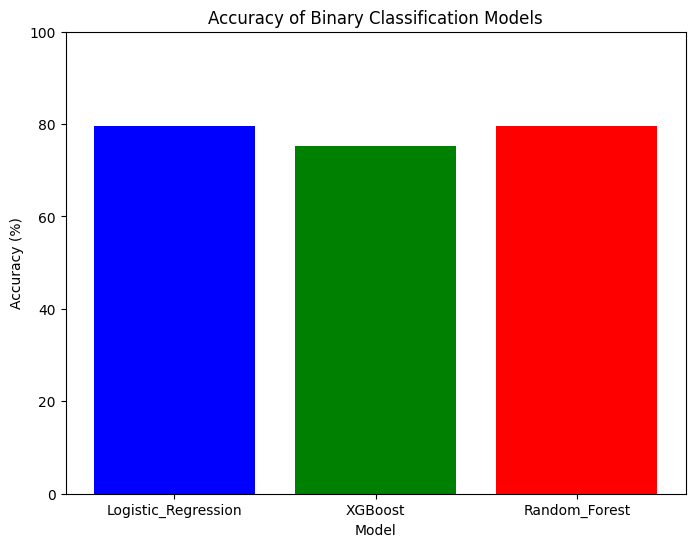

In [ ]:
#Plotting accuracy vs Model.
# Models and their accuracy scores
models = ['Logistic_Regression', 'XGBoost', 'Random_Forest']
accuracy_scores = [79.6, 75.3, 79.5]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green', 'red'])

# Adding title and labels
plt.title('Accuracy of Binary Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')

# Displaying the plot
plt.ylim(0, 100)
plt.show()


1. Logistic Regression, XGBoost, and Random Forest classifiers were trained and evaluated for a binary classification task.
2. While all models performed reasonably well in predicting negative instances, they struggled to accurately predict positive instances.
3. Challenges in correctly identifying positive instances were reflected in low precision, recall, and F1-score for the positive class across all models.